Objective: 
- Demonstrating 3 classification Techniques: Logistic Regression, Decision Tree, and Random Forest

Use case and problem statement:
- **Goal**: Develop a machine learning model that can accurately classify whether a breast tumor is malignant or benign.

Our features are computed from a digitized images of a breast mass.
The dataset contains various features describing characteristics of the cell nuclei present in the image, such as radius, texture, perimeter, area, smoothness, and more.

Given an unseen sample; can we accuractly predict whether it is malignant or benign?

In [ ]:

# ## Imports and Data Loading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, precision_score, recall_score, f1_score

In [4]:
# ## Load the Breast Cancer Wisconsin Dataset
# Load dataset from sklearn
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Quick look at the data
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.02,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020


In [ ]:
# Note that the train_test_split() method shuffled our dataset.
# Quiz 1 - Can we think of a reason why?

In [8]:
# Standardize features for logistic regression
# NOTE: Tree-based methods usually do not require scaling your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training a LogisticRegression classifier

In [9]:
# Fit logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Predict on test set
y_pred_logreg = logreg.predict(X_test_scaled)

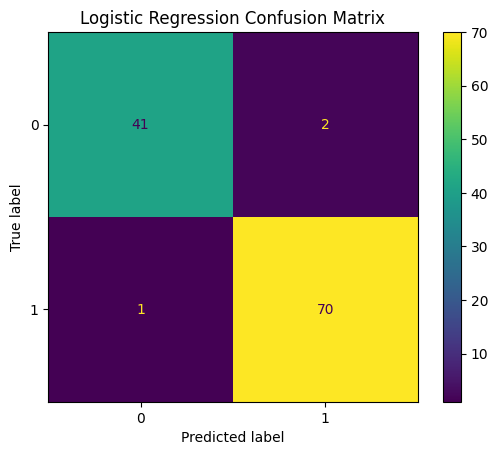

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [14]:
# Predict and evaluate
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))

## Training a decision tree classifer

In [ ]:
# ## Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

In [15]:
# Make prediction on the test set
y_pred_dtree = dtree.predict(X_test)

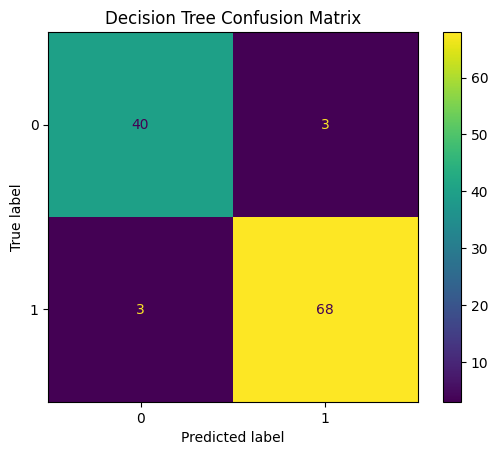

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [16]:
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dtree))

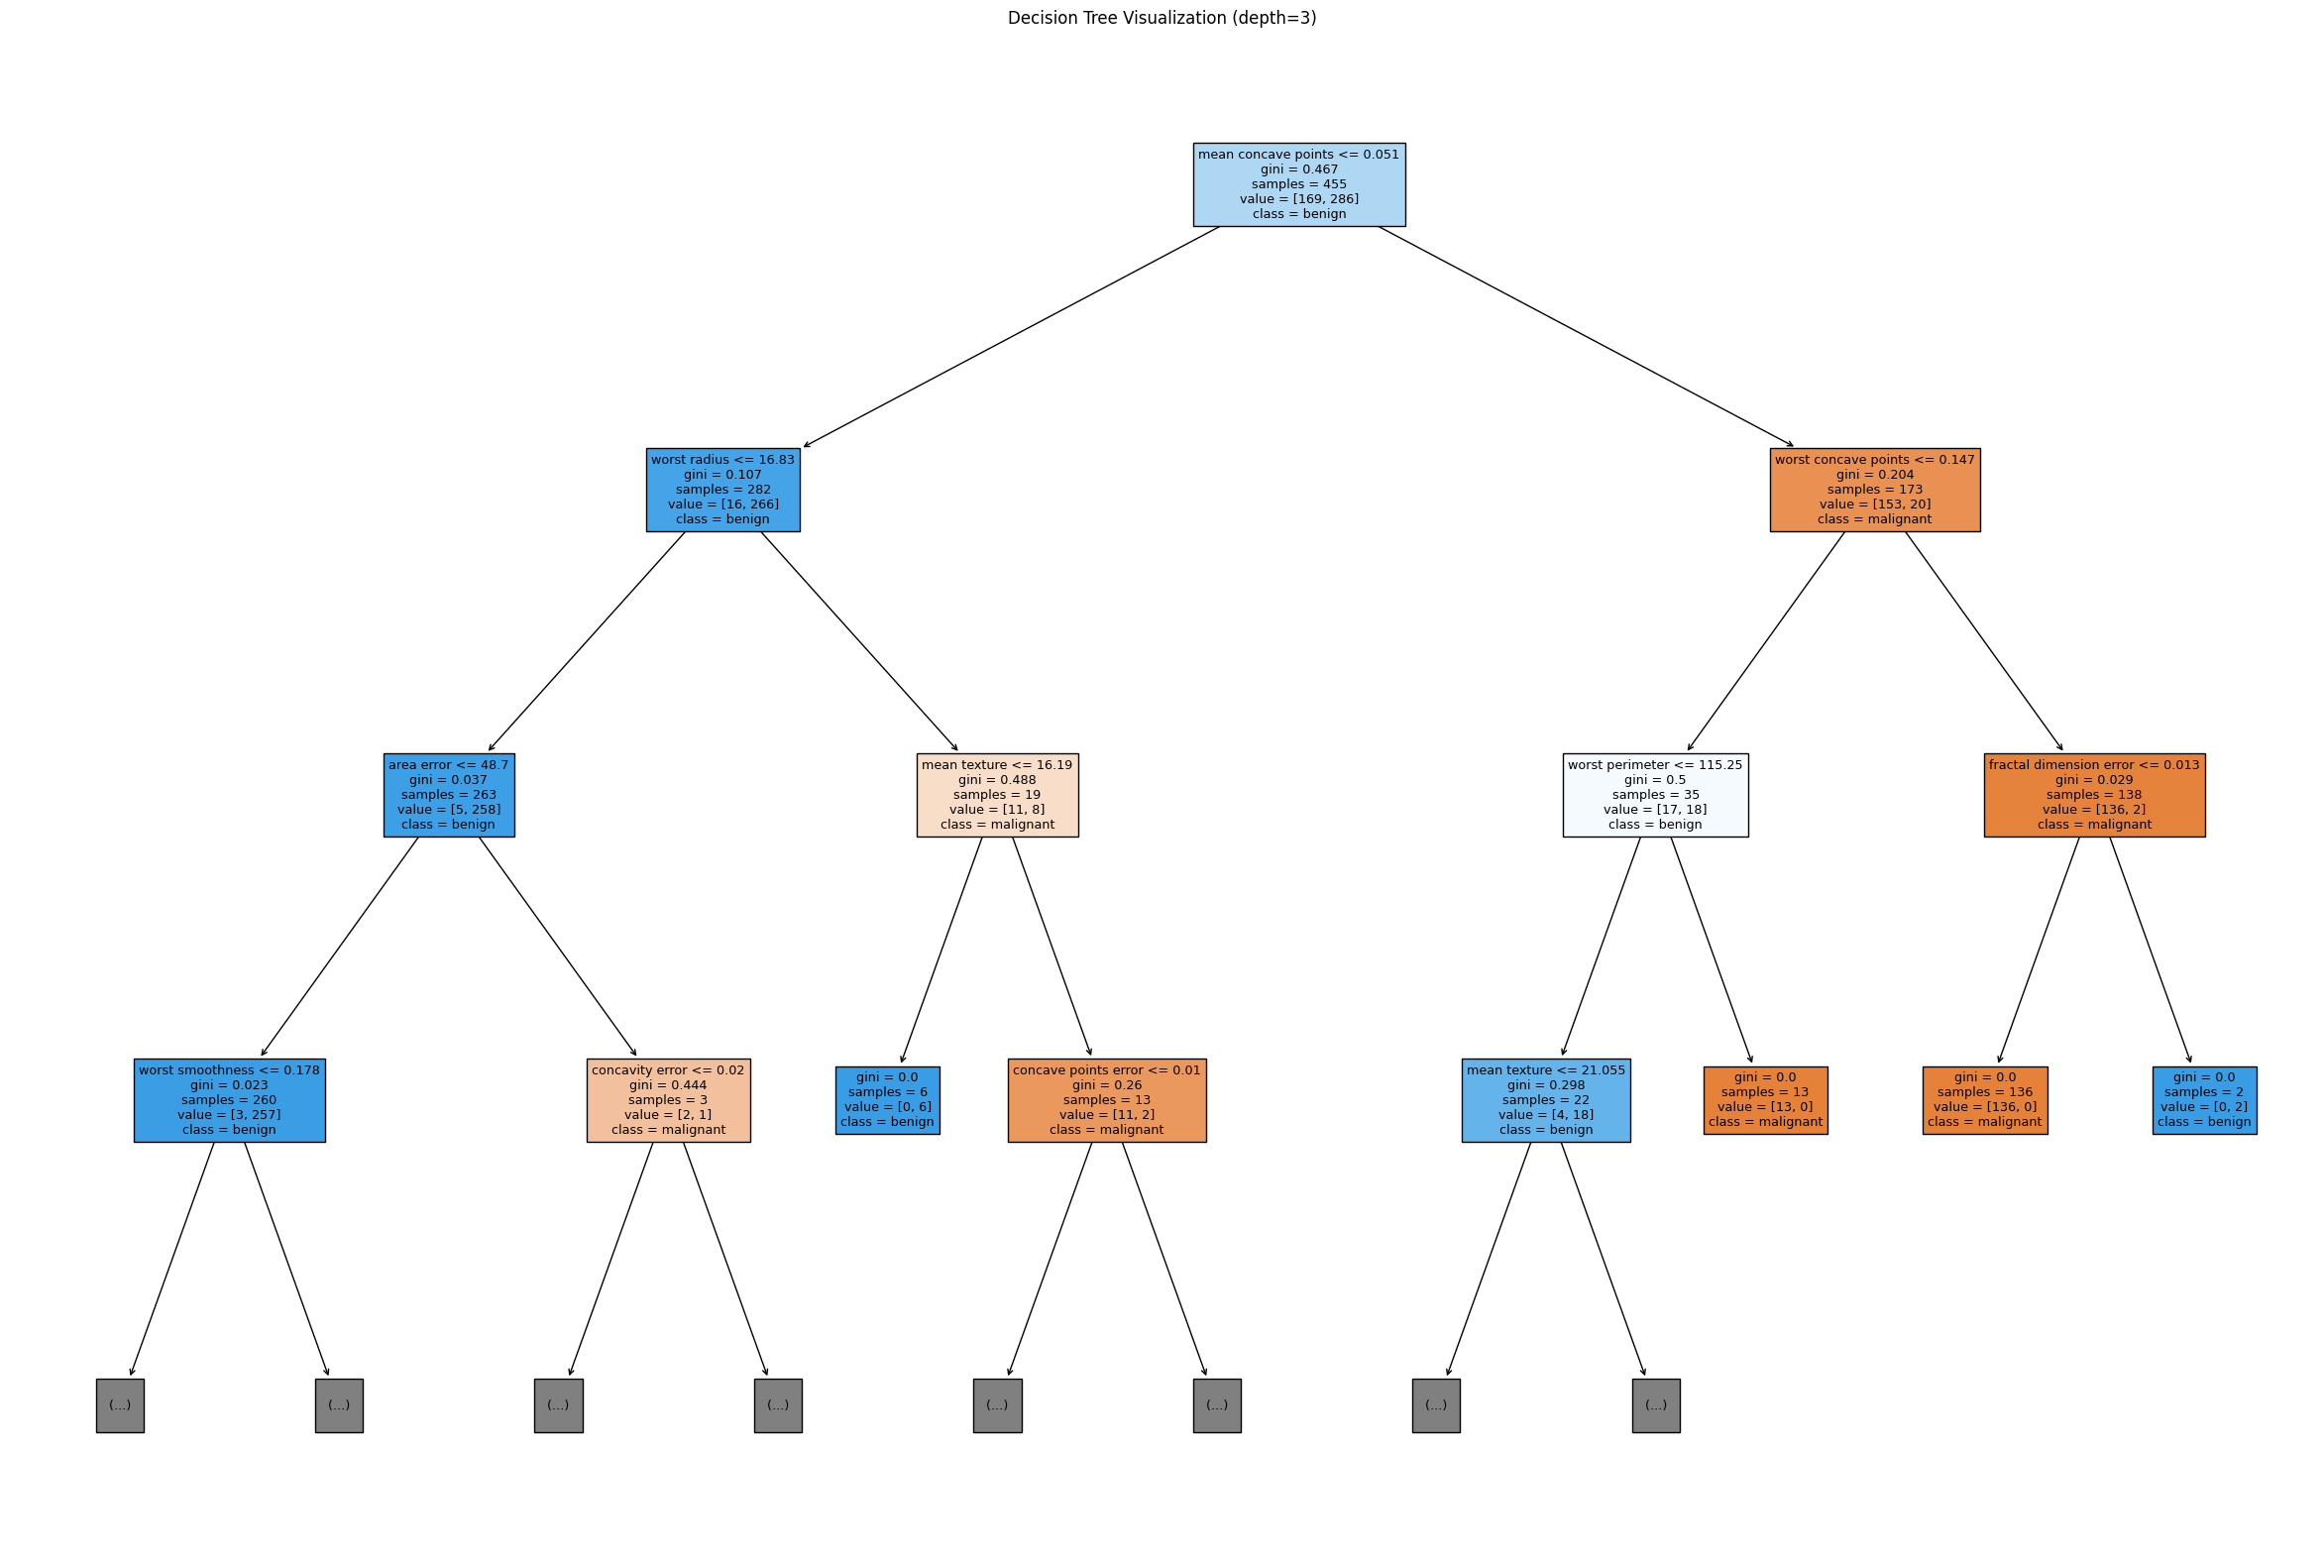

In [18]:
plt.figure(figsize=(30,20))
plot_tree(dtree, feature_names=data.feature_names, class_names=data.target_names, filled=True, max_depth=3)
plt.title("Decision Tree Visualization (depth=3)")
plt.show()

## Random Forest Classifier

In [19]:
rf = RandomForestClassifier(
    n_estimators=100, # Number of trees used in the forest. NOTE that many hyper parameters can be tuned here.
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make prediction on test set
y_pred_rf = rf.predict(X_test)

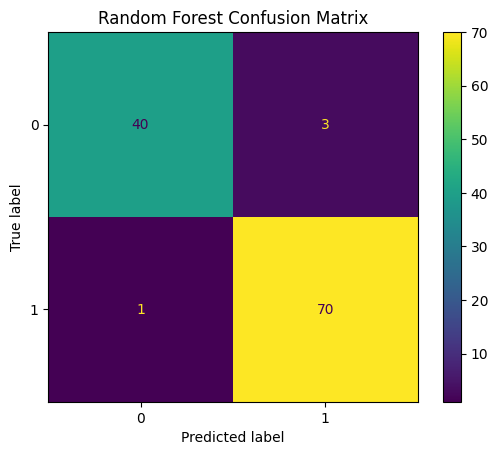

Random Forest Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [21]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

## Looking into a summary of the various performance metrics

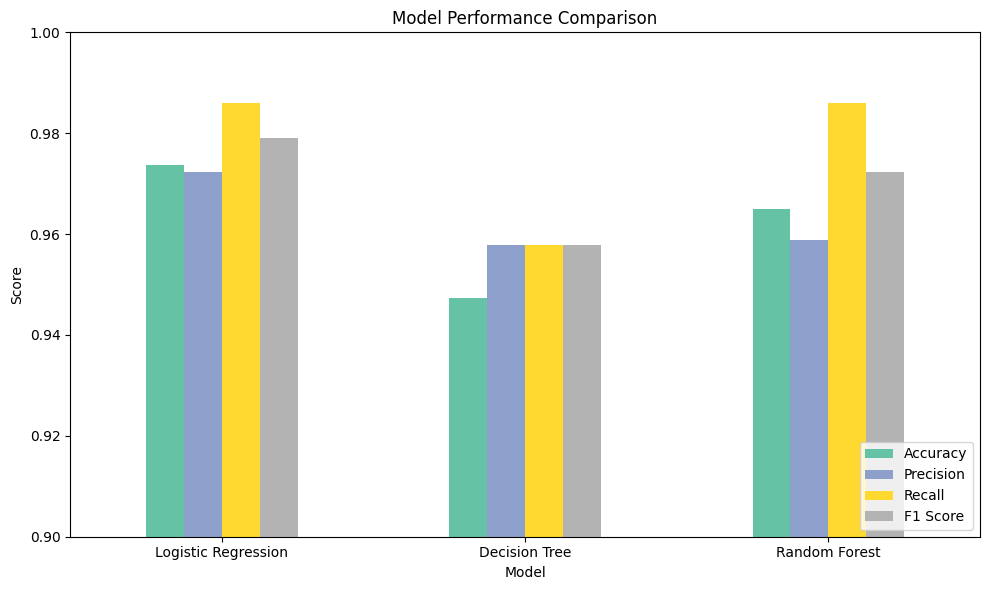

In [24]:
# ## Summary

# Collect model performances
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [logreg.score(X_test_scaled, y_test),
              dtree.score(X_test, y_test),
              rf.score(X_test, y_test)]

precisions = [precision_score(y_test, y_pred_logreg),
              precision_score(y_test, y_pred_dtree),
              precision_score(y_test, y_pred_rf)]

recalls = [recall_score(y_test, y_pred_logreg),
           recall_score(y_test, y_pred_dtree),
           recall_score(y_test, y_pred_rf)]

f1_scores = [f1_score(y_test, y_pred_logreg),
             f1_score(y_test, y_pred_dtree),
             f1_score(y_test, y_pred_rf)]

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Plot the summary metrics
summary_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.9, 1.00)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Reminder 
- **Accuracy:** 
    - The proportion of total correct predictions (both positives and negatives) out of all predictions made.
- **Precision:** 
    - The proportion of correctly predicted positive observations to the total predicted positives. Important when the cost of false positives is high.
- **Recall:**
    - The proportion of actual positives that were correctly identified. Important when the cost of false negatives is high.
- **F1 Score:**
    - The harmonic mean of precision and recall. Best when you need a balance between precision and recall.

In [25]:
# Given the nature of the application; what metric would you choose?